In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
data=pd.read_csv("Fraud_check.csv")

In [4]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
data = pd.get_dummies(data, columns = ['Undergrad','Marital.Status','Urban'])

In [7]:
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [8]:
data["TaxableIncome"]="good"
data.loc[data["Taxable.Income"]<= 30000,"TaxableIncome"]="risk"
data.drop(["Taxable.Income"],axis=1,inplace=True)

In [9]:
data

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,TaxableIncome
0,50047,10,1,0,0,0,1,0,1,good
1,134075,18,0,1,1,0,0,0,1,good
2,160205,30,1,0,0,1,0,0,1,good
3,193264,15,0,1,0,0,1,0,1,good
4,27533,28,1,0,0,1,0,1,0,good
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,good
596,55369,2,0,1,1,0,0,0,1,good
597,154058,0,1,0,1,0,0,0,1,good
598,180083,17,0,1,0,1,0,1,0,good


In [10]:
x = data.iloc[:,0:9]
y = data.iloc[:,9]

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, stratify = y)

In [12]:
y_train.value_counts()

good    381
risk     99
Name: TaxableIncome, dtype: int64

#Building Decision Tree Classifier using Entropy Criteria

In [13]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

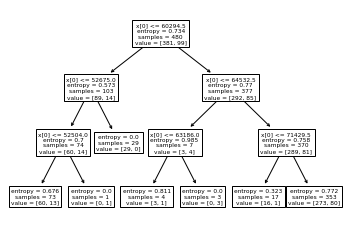

In [14]:
tree.plot_tree(model);

In [15]:
data.columns

Index(['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES', 'TaxableIncome'],
      dtype='object')

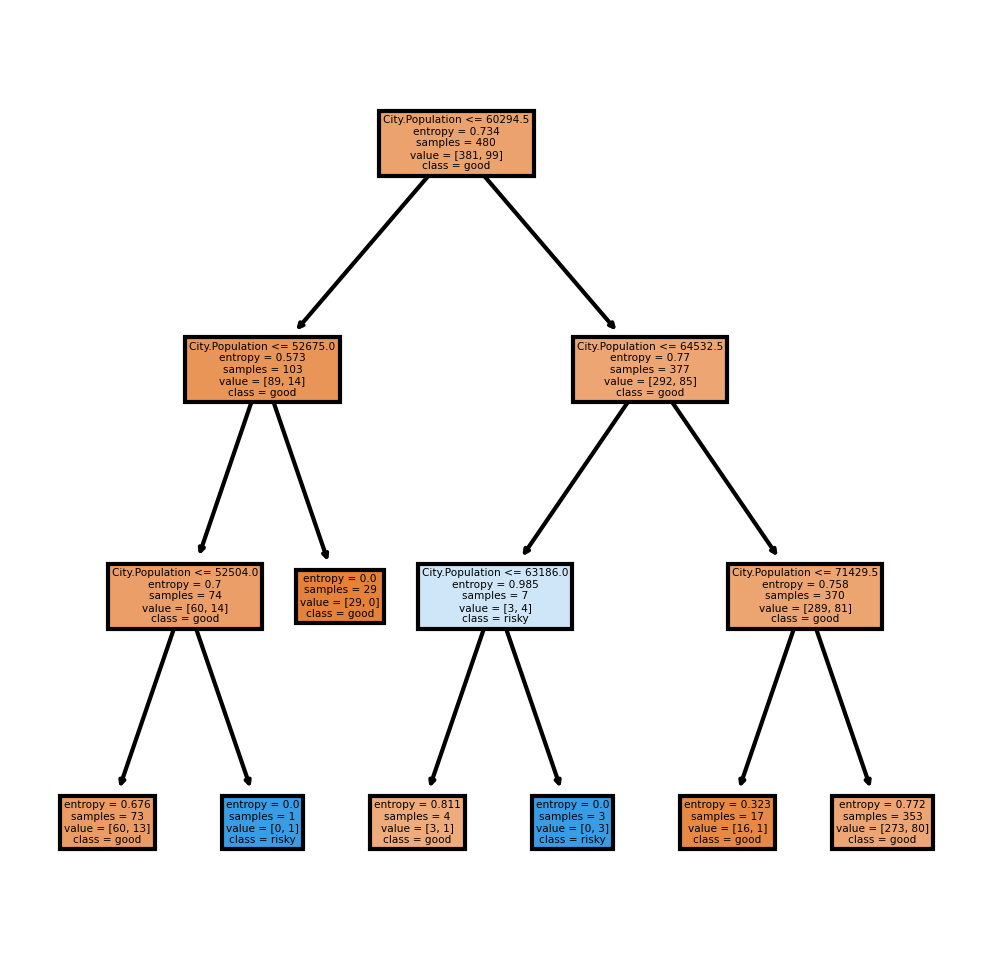

In [16]:
fn=['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES',]
cn=['good','risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [17]:
pred_train = model.predict(x_train)

In [18]:
accuracy_score(y_train,pred_train)

0.8020833333333334

In [19]:
pred_test = model.predict(x_test)

In [20]:
accuracy_score(y_test,pred_test)

0.7833333333333333

In [21]:
confusion_matrix(y_test,pred_test)

array([[93,  2],
       [24,  1]])

#Building Decision Tree Classifier (CART) using Gini Criteria

In [22]:
model2 = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
model2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

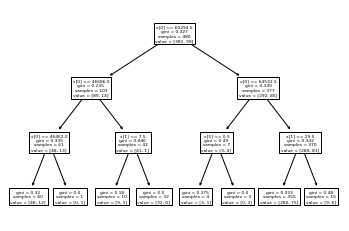

In [24]:
tree.plot_tree(model2);

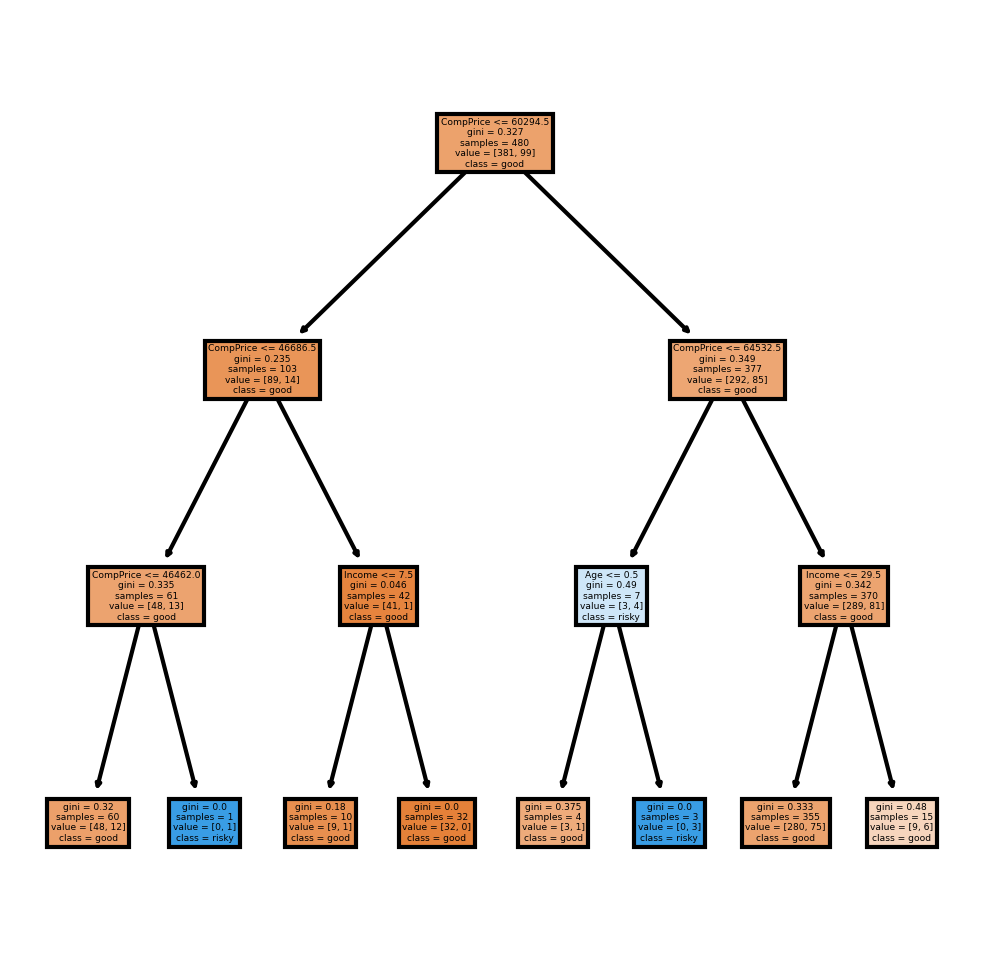

In [25]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes',]
cn=['good','risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [26]:
pred_train_gini = model2.predict(x_train)

In [27]:
accuracy_score(y_train,pred_train_gini)

0.8020833333333334

In [28]:
pred_test_gini = model2.predict(x_test)

In [29]:
accuracy_score(y_test,pred_test_gini)

0.775

In [30]:
confusion_matrix(y_test,pred_test_gini)

array([[93,  2],
       [25,  0]])